# Logistic Regression With IRIS data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [16]:
import os
import urllib.request

data_location = "iris.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/iris/iris_combined.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: iris.csv


In [17]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

iris = pd.read_csv(data_location)
iris.sample(10)

,c1,c2,c3,c4,label
21,6.40,2.80,5.60,2.10,3
121,6.90,3.10,5.40,2.10,3
63,6.40,3.10,5.50,1.80,3
76,5.50,2.40,3.80,1.10,2
53,5.00,3.20,1.20,0.20,1
2,4.90,2.50,4.50,1.70,3
20,6.70,3.30,5.70,2.10,3
37,5.80,2.80,5.10,2.40,3
50,5.00,3.30,1.40,0.20,1
32,6.40,3.20,4.50,1.50,2


## Exploratory Data Analysis (EDA)

In [18]:
iris.describe()

,c1,c2,c3,c4,label
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,2.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,1.00
25%,5.10,2.80,1.60,0.30,1.00
50%,5.80,3.00,4.35,1.30,2.00
75%,6.40,3.30,5.10,1.80,3.00
max,7.90,4.40,6.90,2.50,3.00


In [19]:
# how are our labels distributed

iris['label'].value_counts()

1    50
2    50
3    50
Name: label, dtype: int64

In [20]:
iris['label'].value_counts(normalize=True)

1   0.33
2   0.33
3   0.33
Name: label, dtype: float64

## Shape Data

In [21]:
x = iris[['c1', 'c2', 'c3', 'c4']]
y = iris['label']
print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (150, 4)
y :  (150,)


## Split train/test

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (120, 4)
x_test : (30, 4)
y_train : (120,)
y_test : (30,)


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e5)

# Fit the model
model = lr.fit(x_train, y_train)


/Users/sujee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print('coef : ', model.coef_)
print('intercept' , model.intercept_)

coef :  [[  36.29963696   76.14474781  -87.30183825  -45.37722579]
 [  -7.94862721    4.77122402  -10.80822891 -126.16207785]
 [ -28.35100974  -80.91597183   98.11006717  171.53930364]]
intercept [  23.69232914  327.13770386 -350.83003299]


## Model Evaluation

In [25]:
y_pred = model.predict (x_test)
y_pred

array([2, 3, 3, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 2, 3, 2, 3, 1, 2, 1, 2, 3,
       3, 2, 2, 3, 1, 1, 2, 2])

In [26]:
train_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test,y_test)

print ("Train accuracy: ", train_accuracy)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  0.9916666666666667
Test accuracy:  0.9333333333333333


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  1,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]])

[]

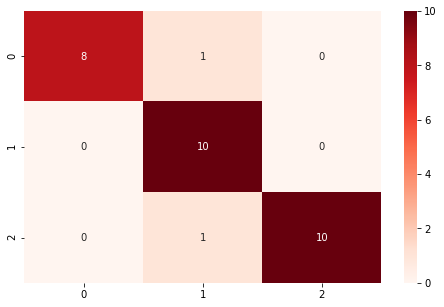

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()